# casting product image data for quality inspection
industrial data,casting manufacturing product, quality inspection, automation

 ## Convolutional Neural Network

In [180]:
import tensorflow as tf
from tensorflow import keras

In [146]:
dataset_path = r'Downloads/archive (60)'

In [184]:
img_height = 64
img_width = 64

In [186]:
training_data = keras.utils.image_dataset_from_directory(dataset_path, 
                                        subset='training',
                                        seed=42,
                                        image_size=(img_height,img_width),
                                        label_mode='binary',
                                        validation_split=0.20,
                                        batch_size= 64
                                        )
validation_data = keras.utils.image_dataset_from_directory(dataset_path, 
                                        subset='validation',
                                        seed=42,
                                        image_size=(img_height,img_width),
                                        label_mode='binary',
                                        validation_split=0.20,
                                        batch_size= 64
                                        )

Found 8650 files belonging to 2 classes.
Using 6920 files for training.
Found 8650 files belonging to 2 classes.
Using 1730 files for validation.


In [265]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    rotation_range=360,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.05,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.75, 1.25],
    rescale=1./255,
    validation_split=0.2
)

In [11]:
normalization_layer = tf.keras.layers.Rescaling(1./64)

train_dataset = training_data.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_data.map(lambda x, y: (normalization_layer(x), y))

In [12]:
training_data.class_names

['casting_512x512', 'casting_data']

## Builiding a CNN model

In [13]:
model = keras.Sequential([
    # Convolutional layers
    keras.layers.Input(shape = (img_height,img_width,3)),
    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    
    # Connecting to the fully connected layer
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    
    # Last layer for output
    keras.layers.Dense(1, activation ='sigmoid')
])

## Compile the model

In [15]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Train the model

In [20]:
history = model.fit(
    training_data,
    validation_data = validation_data,
    epochs = 10
)

Epoch 1/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 74s 620ms/step - accuracy: 0.7970 - loss: 5.2605 - val_accuracy: 0.8566 - val_loss: 0.3031
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 28s 258ms/step - accuracy: 0.8636 - loss: 0.3214 - val_accuracy: 0.9040 - val_loss: 0.2385
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 34s 307ms/step - accuracy: 0.8860 - loss: 0.2711 - val_accuracy: 0.9197 - val_loss: 0.2114
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 37s 265ms/step - accuracy: 0.9020 - loss: 0.2486 - val_accuracy: 0.9046 - val_loss: 0.2496
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 40s 254ms/step - accuracy: 0.9117 - loss: 0.2126 - val_accuracy: 0.9480 - val_loss: 0.1765
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 42s 261ms/step - accuracy: 0.9284 - loss: 0.1792 - val_accuracy: 0.9439 - val_loss: 0.1258
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 41s 254ms/step - accuracy: 0.9427 - loss: 0.1473 - val_accuracy: 0.9145 - val_loss: 0.1893
Epoch 8/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 42s 257ms/step - accuracy: 0.9252 - loss: 0

In [196]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,049,989 (7.82 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,366,660 (5.21 MB)

## Plot the graph

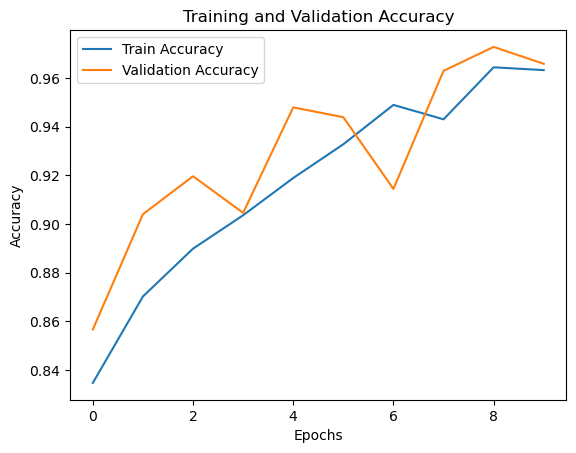

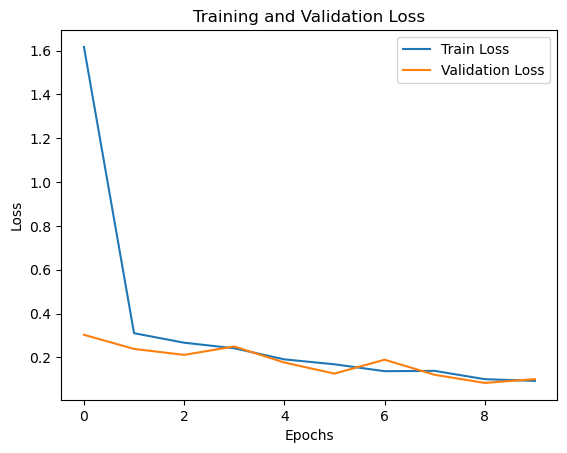

In [24]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

## New prediction

In [211]:
from PIL import Image
import numpy as np

In [213]:
img = Image.open('Downloads/archive (60)/casting_data/casting_data/test/def_front/cast_def_0_1059.jpeg').convert('RGB')

In [279]:
img = img.resize((64,64))

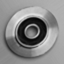

In [281]:
img

In [283]:
img_array = np.array(img) / 64.0

In [285]:
img_array = np.expand_dims(img_array, axis=0)

In [287]:
prediction = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


In [289]:
class_index = np.argmax(prediction)

In [291]:
class_name = ['casting_data', 'casting_512x512']

In [293]:
def predict(img):
    img = img.resize((64,64))
    img_array = np.expand_dims(img, axis=0)
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    return class_name[class_index]
        

In [295]:
predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


'casting_data'

In [297]:
model.save("Image_Classification.keras")

In [299]:
model = keras.models.load_model("Image_Classification.keras")